In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_hub as hub
import tensorflow_datasets as tfds

from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [17]:
import keras
from keras.applications.mobilenet import MobileNet

from sklearn.metrics import confusion_matrix
from keras.layers.core import Dense, Activation
from keras.metrics import categorical_crossentropy
from keras.metrics import binary_crossentropy
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf
from keras.preprocessing import image

In [18]:
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
validation_datagen = image.ImageDataGenerator(
    rescale = 1./255
)

In [19]:
train = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/DEFENCE/implement 2/dataset/train',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

validation = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/DEFENCE/implement 2/dataset/validation',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

test = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/DEFENCE/implement 2/dataset/test',
    target_size = (224, 224),
    batch_size = 32,
    shuffle = False,
    class_mode = 'categorical'
)

Found 12839 images belonging to 4 classes.
Found 1835 images belonging to 4 classes.
Found 3670 images belonging to 4 classes.


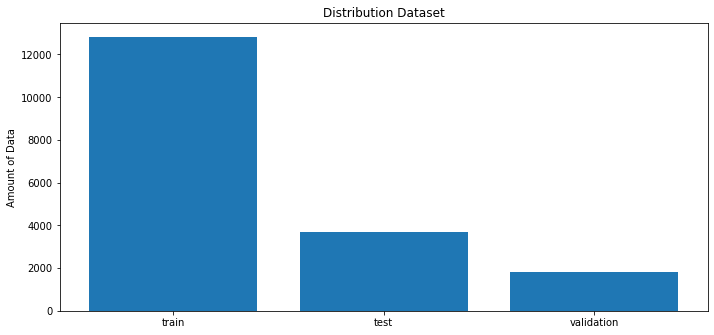

In [20]:
import os
train1 = sum([len(files) for r, d, files in os.walk('/content/drive/MyDrive/DEFENCE/implement 2/dataset/train')])
test1 = sum([len(files) for r, d, files in os.walk('/content/drive/MyDrive/DEFENCE/implement 2/dataset/test')])
validation1 = sum([len(files) for r, d, files in os.walk('/content/drive/MyDrive/DEFENCE/implement 2/dataset/validation')])

fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1])

ax.set_title('Distribution Dataset')
label = ['train','test','validation']
data = [train1,test1,validation1]
ax.bar(label,data)
plt.ylabel("Amount of Data")

plt.xlabel("")

plt.show()

In [21]:
# useful for getting number of output classes
from glob import glob
folders = glob('/content/drive/MyDrive/DEFENCE/implement 2/dataset/*/*')
#f=len(os.listdir(folders[11]))
#print(f)
fire=len(os.listdir(folders[2]))+len(os.listdir(folders[5]))+len(os.listdir(folders[10]))
nonfire=len(os.listdir(folders[3]))+len(os.listdir(folders[6]))+len(os.listdir(folders[9]))
smoke=len(os.listdir(folders[1]))+len(os.listdir(folders[7]))+len(os.listdir(folders[8]))
fog=len(os.listdir(folders[0]))+len(os.listdir(folders[4]))+len(os.listdir(folders[11]))

print("FIRE: ",fire)
print("NONFIRE: ",nonfire)
print("SMOKE: ",smoke)
print("FOG: ",fog)

FIRE:  3908
NONFIRE:  4060
SMOKE:  5088
FOG:  5288


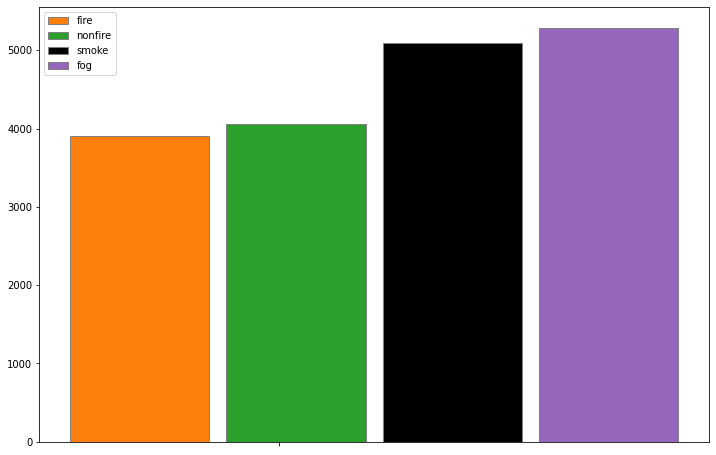

In [22]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
xx = [0]
# Set position of bar on X axis
br1 = np.arange(len(xx))
br2 = [x + barWidth+0.03 for x in br1]
br3 = [x + barWidth+0.03 for x in br2]
br4 = [x + barWidth+0.03 for x in br3]
 
# Make the plot
plt.bar(br1, fire, color ='tab:orange', width = barWidth,
        edgecolor ='grey', label ='fire')
plt.bar(br2, nonfire, color ='tab:green', width = barWidth,
        edgecolor ='grey', label ='nonfire')
plt.bar(br3, smoke, color ='k', width = barWidth,
        edgecolor ='grey', label ='smoke')
plt.bar(br4, fog, color ='tab:purple', width = barWidth,
        edgecolor ='grey', label ='fog')
 
# Adding Xticks
#plt.xlabel('Branch', fontweight ='bold', fontsize = 15)
#plt.ylabel('Students passed', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(xx))],
        ['','fire', 'nonfire', 'smoke', 'fog'])

plt.legend()
plt.show()

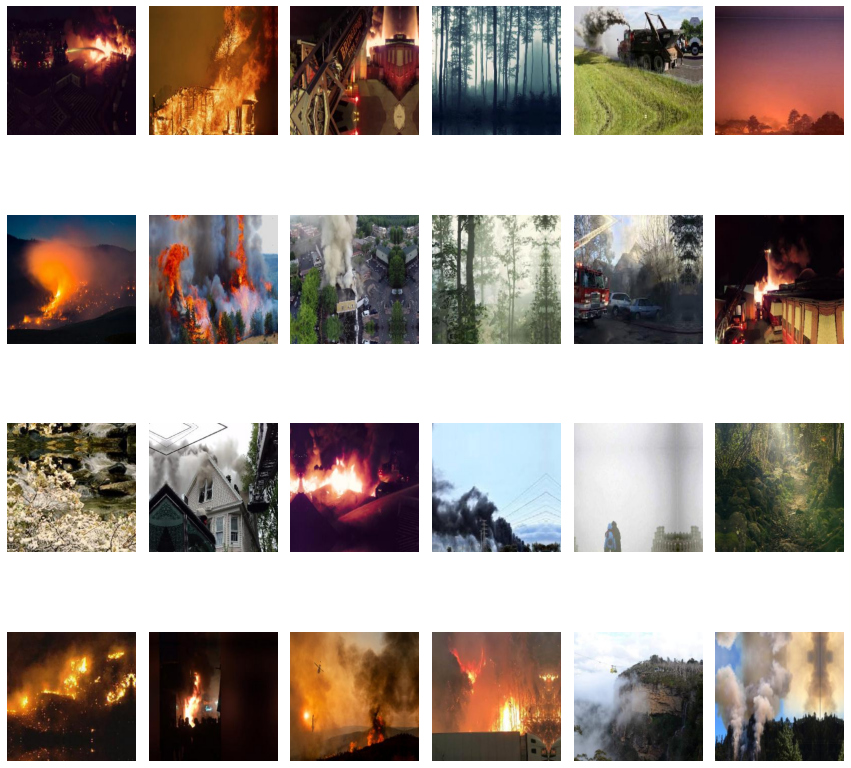

In [23]:
import cv2
import matplotlib.pyplot as plt
image_path=('/content/drive/MyDrive/DEFENCE/implement 2/dataset/train')
plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

for i in range(24):
    random_folder=np.random.randint(0,len(os.listdir(image_path)))
    random_folder_path=os.path.join(image_path,os.listdir(image_path)[random_folder])
    random_image=np.random.randint(0,len(os.listdir(random_folder_path)))
    random_image_path=os.path.join(random_folder_path,os.listdir(random_folder_path)[random_image])
    image=cv2.imread(random_image_path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.subplot(4,6,i+1)
    plt.imshow(image)
    plt.axis("off")
plt.show()

In [24]:
MobileNetv2 = tf.keras.applications.MobileNetV2(
    include_top=False, 
    weights = 'imagenet', 
    input_shape=(224,224,3),
    )

In [25]:
MobileNetv2.trainable = False

In [26]:
model = tf.keras.models.Sequential([
  MobileNetv2,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.8),
  tf.keras.layers.Dense(units=1024, activation='relu'),
  tf.keras.layers.Dense(units=512, activation='relu'),
  tf.keras.layers.Dense(units=4, activation='softmax'), 
])

In [27]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_1 (Flatten)         (None, 62720)             0         
                                                                 
 dropout_1 (Dropout)         (None, 62720)             0         
                                                                 
 dense_3 (Dense)             (None, 1024)              64226304  
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dense_5 (Dense)             (None, 4)                 2052      
                                                      

In [28]:















history = model.fit(
    x = train,     
    validation_data = validation,
    epochs = 50
)

Epoch 1/50
402/402 [==============================] - 463s 1s/step - loss: 0.9095 - accuracy: 0.8725 - val_loss: 0.2926 - val_accuracy: 0.9030
Epoch 2/50
402/402 [==============================] - 463s 1s/step - loss: 0.2287 - accuracy: 0.9243 - val_loss: 0.2536 - val_accuracy: 0.9161
Epoch 3/50
402/402 [==============================] - 524s 1s/step - loss: 0.1746 - accuracy: 0.9430 - val_loss: 0.2207 - val_accuracy: 0.9215
Epoch 4/50
402/402 [==============================] - 485s 1s/step - loss: 0.1554 - accuracy: 0.9480 - val_loss: 0.2288 - val_accuracy: 0.9264
Epoch 5/50
402/402 [==============================] - 481s 1s/step - loss: 0.1462 - accuracy: 0.9518 - val_loss: 0.2245 - val_accuracy: 0.9128
Epoch 6/50
402/402 [==============================] - 490s 1s/step - loss: 0.1291 - accuracy: 0.9557 - val_loss: 0.2995 - val_accuracy: 0.9019
Epoch 7/50
402/402 [==============================] - 490s 1s/step - loss: 0.1109 - accuracy: 0.9611 - val_loss: 0.2313 - val_accuracy: 0.9232

In [29]:
# Evaluate the loss and accuracy
loss, accuracy = model.evaluate(test)

# Print the accuracy
print("Accuracy: " + str(accuracy))
# Print the loss
print("Loss: " + str(loss))

115/115 [==============================] - 1304s 11s/step - loss: 0.4686 - accuracy: 0.9381
Accuracy: 0.9381471276283264
Loss: 0.4685865044593811


In [30]:
#accuracy and loss in persentence

# Print the accuracy
print("Accuracy: " + str(round(accuracy*100, 4))+" %")
# Print the loss
print("Loss: " + str(round(loss*100, 4))+" %")

Accuracy: 93.8147 %
Loss: 46.8587 %


In [31]:
test.class_indices

{'fire': 0, 'fog': 1, 'nonfire': 2, 'smoke': 3}

In [32]:
import numpy as np
from sklearn import metrics

predictions = model.predict(test)
predicted_classes = np.argmax(predictions, axis = 1)
true_classes = test.classes
class_labels = ['fire', 'fog','nonfire','smoke']
report = metrics.classification_report(true_classes, predicted_classes, target_names = class_labels)
print(report)

115/115 [==============================] - 94s 806ms/step
              precision    recall  f1-score   support

        fire       0.95      0.97      0.96       782
         fog       0.87      0.97      0.92      1058
     nonfire       0.97      0.96      0.97       812
       smoke       0.98      0.86      0.92      1018

    accuracy                           0.94      3670
   macro avg       0.94      0.94      0.94      3670
weighted avg       0.94      0.94      0.94      3670



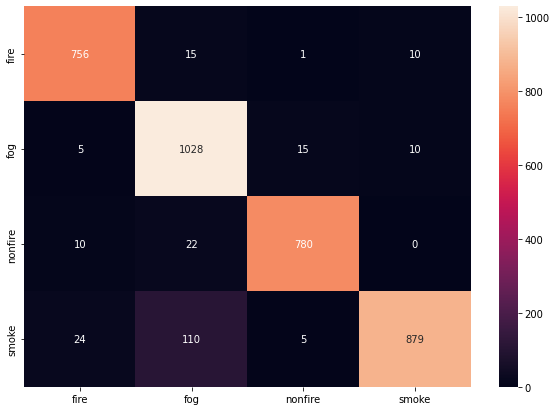

In [33]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(true_classes, predicted_classes)
df_cm = pd.DataFrame(cm, index = [i for i in ['fire', 'fog','nonfire','smoke']],
                  columns = [i for i in ['fire', 'fog','nonfire','smoke']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='d')

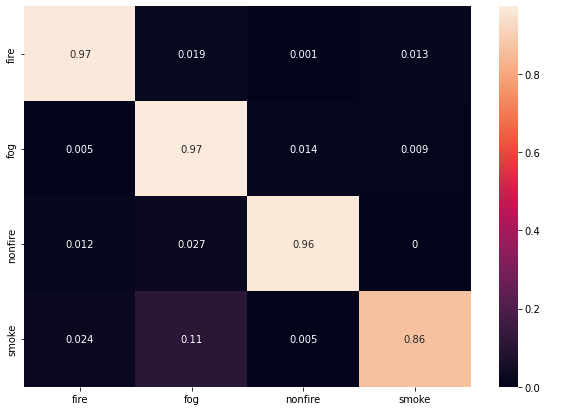

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
cm=metrics.confusion_matrix(true_classes, predicted_classes)

cm=np.round(cm/np.sum(cm,axis=1).reshape(-1,1),3)
cm = pd.DataFrame(cm, index = [i for i in ['fire', 'fog','nonfire','smoke']],
                  columns = [i for i in ['fire', 'fog','nonfire','smoke']])
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True,cbar_kws={"orientation":"vertical","label":" "})
#plt.xlabel("Predicted")
#plt.ylabel("Actual")
#plt.title("Normalized Confusion Matrix")
plt.show()

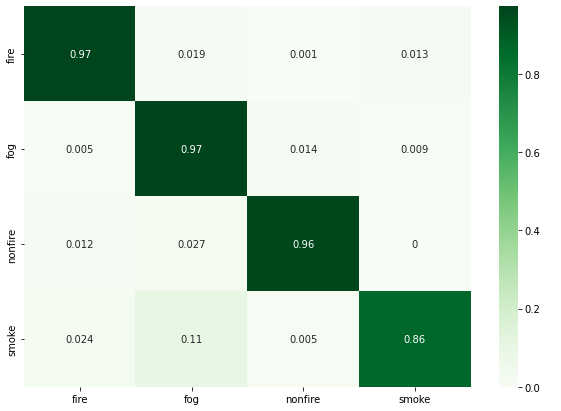

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
cm=metrics.confusion_matrix(true_classes, predicted_classes)

cm=np.round(cm/np.sum(cm,axis=1).reshape(-1,1),3)
cm = pd.DataFrame(cm, index = [i for i in ['fire', 'fog','nonfire','smoke']],
                  columns = [i for i in ['fire', 'fog','nonfire','smoke']])
plt.figure(figsize = (10,7))
sns.heatmap(cm,cmap="Greens",annot=True,cbar_kws={"orientation":"vertical","label":" "})
#plt.xlabel("Predicted")
#plt.ylabel("Actual")
#plt.title("Normalized Confusion Matrix")
plt.show()

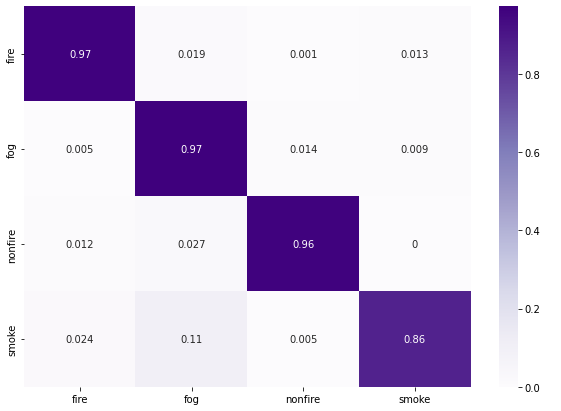

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
cm=metrics.confusion_matrix(true_classes, predicted_classes)

cm=np.round(cm/np.sum(cm,axis=1).reshape(-1,1),3)
cm = pd.DataFrame(cm, index = [i for i in ['fire', 'fog','nonfire','smoke']],
                  columns = [i for i in ['fire', 'fog','nonfire','smoke']])
plt.figure(figsize = (10,7))
sns.heatmap(cm,cmap="Purples",annot=True,cbar_kws={"orientation":"vertical","label":" "})
#plt.xlabel("Predicted")
#plt.ylabel("Actual")
#plt.title("Normalized Confusion Matrix")
plt.show()

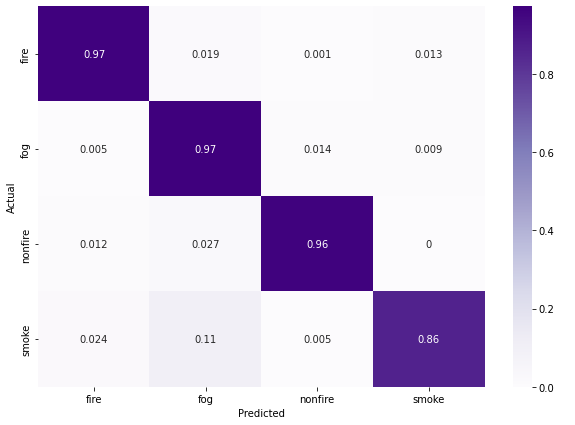

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
cm=metrics.confusion_matrix(true_classes, predicted_classes)

cm=np.round(cm/np.sum(cm,axis=1).reshape(-1,1),3)
cm = pd.DataFrame(cm, index = [i for i in ['fire', 'fog','nonfire','smoke']],
                  columns = [i for i in ['fire', 'fog','nonfire','smoke']])
plt.figure(figsize = (10,7))
sns.heatmap(cm,cmap="Purples",annot=True,cbar_kws={"orientation":"vertical","label":" "})
plt.xlabel("Predicted")
plt.ylabel("Actual")
#plt.title("Normalized Confusion Matrix")
plt.show()

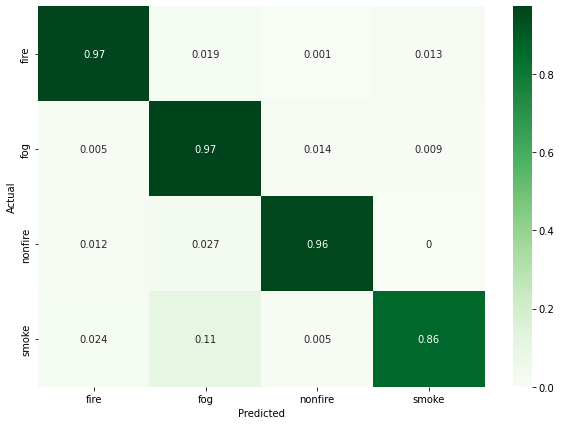

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
cm=metrics.confusion_matrix(true_classes, predicted_classes)

cm=np.round(cm/np.sum(cm,axis=1).reshape(-1,1),3)
cm = pd.DataFrame(cm, index = [i for i in ['fire', 'fog','nonfire','smoke']],
                  columns = [i for i in ['fire', 'fog','nonfire','smoke']])
plt.figure(figsize = (10,7))
sns.heatmap(cm,cmap="Greens",annot=True,cbar_kws={"orientation":"vertical","label":" "})
plt.xlabel("Predicted")
plt.ylabel("Actual")
#plt.title("Normalized Confusion Matrix")
plt.show()

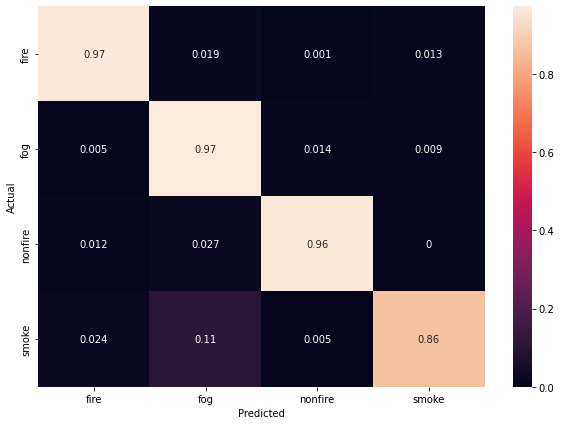

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
cm=metrics.confusion_matrix(true_classes, predicted_classes)

cm=np.round(cm/np.sum(cm,axis=1).reshape(-1,1),3)
cm = pd.DataFrame(cm, index = [i for i in ['fire', 'fog','nonfire','smoke']],
                  columns = [i for i in ['fire', 'fog','nonfire','smoke']])
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True,cbar_kws={"orientation":"vertical","label":" "})
plt.xlabel("Predicted")
plt.ylabel("Actual")
#plt.title("Normalized Confusion Matrix")
plt.show()

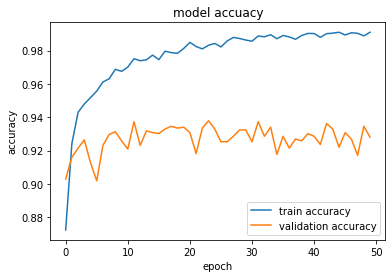

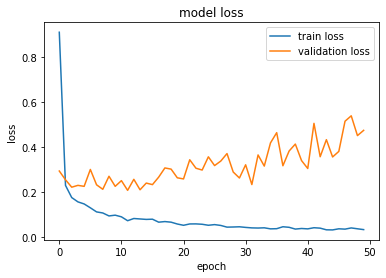

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuacy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
plt.show()

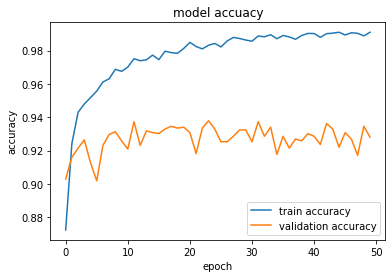

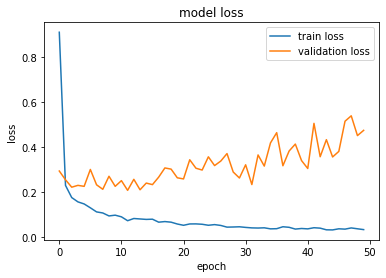

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuacy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
plt.show()

In [42]:
model.save('/content/drive/MyDrive/DEFENCE/implement 2/model_MobileNetV2.h5')